In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#inputfile = "input_test.txt"
inputfile = "input.txt"

In [3]:
with open(inputfile,'r') as f:
    iea = f.readline().replace('.','0').replace('#','1') #image enhancement algorithm

    f.readline() # skip one line

    imglines = f.read().replace('.','0').replace('#','1').splitlines()

In [4]:
iea

'10101000111001011000111111001110010001010101101101010100110010011100010010101010100001101100100001100010010111011101100011110001100001001001010111000101001100101000000010001110011110011001101101110010100011000101110100110011110100000001110001111010100001010101011011011110010010011001000000110000010010100100101101111111100000000010111011111000110100011110100101001000010110001101101011011000000111101110100110100111011001110101110001111110111111100010011000100000001110010111101011110101000000101010100010011100\n'

In [5]:
len(iea)

513

In [6]:
img=[]
for l0 in imglines:
    img0 = [int(char) for char in l0]
    img.append(img0)

In [7]:
img_np = np.array(img)
img_np

array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 0, 0]])

In [8]:
img_np.shape

(100, 100)

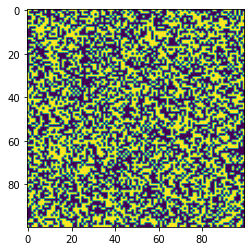

In [9]:
plt.imshow(img_np)

In [10]:
def boollist_to_int(x):
    y = 0
    size = len(x)
    for index,value in enumerate(x):
        y += value<< (size-1-index) #binary shift of value (1 or 0) by index times
    return int(y)

In [11]:
def applyEnhNoPad(img_np1):
    #Applies no padding
    img_res = np.zeros_like(img_np1)
    #Apply enhancement to all pixels
    for j in range(1, img_np1.shape[0]-1):
        for i in range(1 , img_np1.shape[1]-1):
            #Get the 3x3 elements around (j,i)
            code_arr = img_np1[j-1:j+2 , i-1:i+2]
            code_flat = code_arr.flatten()

            #Create the int from the flattened binary
            codevalue = boollist_to_int(code_flat)
            
            # get the new value from the translator
            newimgvalue = int(iea[codevalue])

            img_res[j,i] = newimgvalue #Replaces value

    return img_res

In [49]:
def enhanceImgByNTimes(img_np,n):
    shape0 = img_np.shape

    #On each side and per iteration:
    #central region grows by 1  per iteration
    #Edge effects grow by 1 per iteration
    #need starting padding of 2 to account for first iteration
    pad = 2 + 2*n

    newshape = [ 2*pad+i for i in shape0]

    img_np1 = np.zeros(newshape, dtype=np.int8)
    img_np1[pad:-pad,pad:-pad] = img_np

    img_res=np.copy(img_np1)
    for i in range(n):
        print(f"iteration {i}")
        img_res = applyEnhNoPad(img_res)

    img_res_crop = img_res[n:-n , n:-n]
    sumvalue = np.sum(img_res_crop)
    print(f"sumvalue = {sumvalue}")
    return img_res_crop , sumvalue

In [57]:
#imgn, sumval = enhanceImgByNTimes(img_np,2) #sumvalue should give 5268
#imgn, sumval = enhanceImgByNTimes(img_np,10)
imgn, sumval = enhanceImgByNTimes(img_np,50)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
sumvalue = 16875


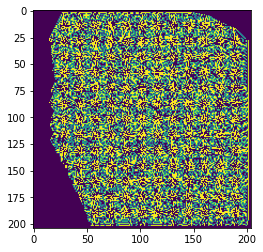

In [58]:
plt.imshow(imgn)

In [59]:
np.sum(imgn)

16875